<a href="https://colab.research.google.com/github/mohammedomer12/Coffee_Roasting/blob/main/Autism_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from numpy.random import RandomState
import sklearn.metrics
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestClassifier


In [120]:
df_train = pd.read_csv('/train.csv', index_col = 0)
df_train.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,1,0,1,0,1,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
2,0,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
3,1,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
4,0,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
5,0,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
6,1,0,0,0,0,1,0,0,1,1,...,m,Middle Eastern,no,no,Jordan,no,9.562117,18 and more,Self,0
7,1,0,0,0,0,0,1,1,1,0,...,f,Pasifika,no,no,United Kingdom,no,7.984569,18 and more,Self,0
8,1,1,1,1,1,1,1,0,1,1,...,m,Black,no,yes,United States,no,13.237898,18 and more,Self,1
9,1,1,1,1,0,0,0,1,1,1,...,m,White-European,no,no,Brazil,no,-1.755774,18 and more,Self,0


In [121]:
df_train.shape

(800, 21)

In [122]:
df_train.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [123]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    float64
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result          

In [124]:
df_test = pd.read_csv('/test.csv', index_col = 0)
df_test.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
ID,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,1,1,0,0,1,1,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
2,1,0,0,0,0,0,0,1,0,0,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
3,1,1,1,0,1,1,0,1,1,1,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
4,0,0,0,0,0,0,0,0,0,0,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
5,0,0,0,1,0,0,0,0,0,0,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self
6,0,0,0,0,0,0,1,0,0,0,31.258965,f,?,yes,no,Australia,no,2.676620,18 and more,Self
7,1,1,1,1,0,1,1,1,1,1,11.753213,m,?,yes,no,United States,no,11.325547,18 and more,Self
8,1,1,1,0,1,1,0,1,0,1,24.606191,f,?,no,no,India,no,1.501130,18 and more,Self
9,0,0,0,0,0,0,0,0,0,0,16.408653,m,?,no,no,Jordan,no,8.569645,18 and more,Self


In [125]:
df_train['age_desc'].unique()

array(['18 and more'], dtype=object)

In [126]:
df_train = df_train[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result','relation', 'Class/ASD']]

In [127]:
df_train['used_app_before'].unique()

array(['no', 'yes'], dtype=object)

In [128]:
df_train = df_train.replace('?',np.nan)
df_train = df_train.replace('yes', 1)
df_train = df_train.replace('no', 0)

In [129]:
df_train.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
ID,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,1,0,1,0,1,1,38.172746,f,NaN,0,0,Austria,0,6.351166,Self,0
2,0,0,0,0,0,0,0,0,0,0,47.750517,m,NaN,0,0,India,0,2.255185,Self,0
3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,0,1,United States,0,14.851484,Self,1
4,0,0,0,0,0,0,0,0,0,0,23.561927,f,NaN,0,0,United States,0,2.276617,Self,0
5,0,0,0,0,0,0,0,0,0,0,43.205790,m,NaN,0,0,South Africa,0,-4.777286,Self,0


In [130]:
df_test = df_test.drop(['age_desc'], axis = 1)

In [131]:
df_test = df_test.replace('?',np.nan)
df_test = df_test.replace('no',0)
df_test = df_test.replace('yes',1)

In [132]:
df_train.groupby(['gender'])['gender'].count()

gender
f    270
m    530
Name: gender, dtype: int64

In [133]:
df_train = df_train.replace('f',1)
df_train = df_train.replace('m',0)
df_test = df_test.replace('f',1)
df_test = df_test.replace('m',0)

In [134]:
df_train['relation'].unique()

array(['Self', 'Relative', 'Parent', nan, 'Others',
       'Health care professional'], dtype=object)

In [135]:
df_train.groupby(['relation'])['relation'].count()

relation
Health care professional      2
Others                        2
Parent                       29
Relative                     18
Self                        709
Name: relation, dtype: int64

In [136]:
df_train['relation'] = df_train['relation'].replace(np.nan, 'Others')

In [137]:
df_train.sample(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
ID,,,,,,,,,,,,,,,,,,,,
187,1,1,0,1,1,1,1,1,1,1,22.923018,1,Asian,1,1,Sweden,0,14.815028,Self,0
701,1,1,1,1,1,1,1,1,1,1,33.571888,0,White-European,1,0,United States,0,5.149519,Self,1
58,1,1,0,0,0,0,0,1,0,0,48.359471,1,Middle Eastern,0,0,India,0,0.602478,Self,0
565,1,1,1,1,1,1,1,1,1,1,29.235577,0,White-European,0,1,Brazil,0,14.640233,Parent,1
512,1,1,1,0,0,0,0,0,0,1,6.448356,0,Black,1,0,India,0,2.621031,Self,0
649,1,1,1,1,1,1,1,1,1,1,31.117705,0,White-European,0,1,Canada,0,14.301846,Self,1
685,0,0,0,0,0,0,0,0,0,0,19.602312,1,NaN,0,0,India,0,6.323963,Self,0
676,1,0,1,0,1,0,1,1,0,1,37.499513,0,Black,0,1,Mexico,0,10.529499,Self,0
781,0,1,1,0,0,0,1,1,1,0,23.512162,0,Hispanic,0,0,United States,1,9.220904,Relative,1


In [138]:
df_test['relation'].unique()

array(['Self', 'Parent', nan, 'Relative', 'Others',
       'Health care professional'], dtype=object)

In [139]:
df_test['relation'] = df_test['relation'].replace(np.nan ,'Others')

In [140]:
df_test.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation
ID,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,1,1,0,0,1,1,15.599481,0,White-European,1,0,India,0,12.399055,Self
2,1,0,0,0,0,0,0,1,0,0,27.181099,0,Asian,0,0,Mexico,0,6.551598,Self
3,1,1,1,0,1,1,0,1,1,1,31.643906,0,White-European,1,0,Egypt,0,3.180663,Self
4,0,0,0,0,0,0,0,0,0,0,25.369210,0,NaN,0,0,India,0,2.220766,Self
5,0,0,0,1,0,0,0,0,0,0,9.078580,0,NaN,0,0,Italy,0,7.252028,Self
6,0,0,0,0,0,0,1,0,0,0,31.258965,1,NaN,1,0,Australia,0,2.676620,Self
7,1,1,1,1,0,1,1,1,1,1,11.753213,0,NaN,1,0,United States,0,11.325547,Self
8,1,1,1,0,1,1,0,1,0,1,24.606191,1,NaN,0,0,India,0,1.501130,Self
9,0,0,0,0,0,0,0,0,0,0,16.408653,0,NaN,0,0,Jordan,0,8.569645,Self


In [141]:
df_train.isnull().sum()

A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity          203
jaundice             0
austim               0
contry_of_res        0
used_app_before      0
result               0
relation             0
Class/ASD            0
dtype: int64

In [142]:
df_train.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,used_app_before,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,0.337500,0.231250,0.16375,0.062500,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,0.473153,0.421896,0.37028,0.242213,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,0.000000,0.000000,0.00000,0.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,0.000000,0.000000,0.00000,0.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,0.000000,0.000000,0.00000,0.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,1.000000,0.000000,0.00000,0.000000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,1.000000,1.000000,1.00000,1.000000,15.853126,1.000000


In [143]:
data_train = df_train
data_test = df_test

<ipython-input-144-8d46221e18e6>:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



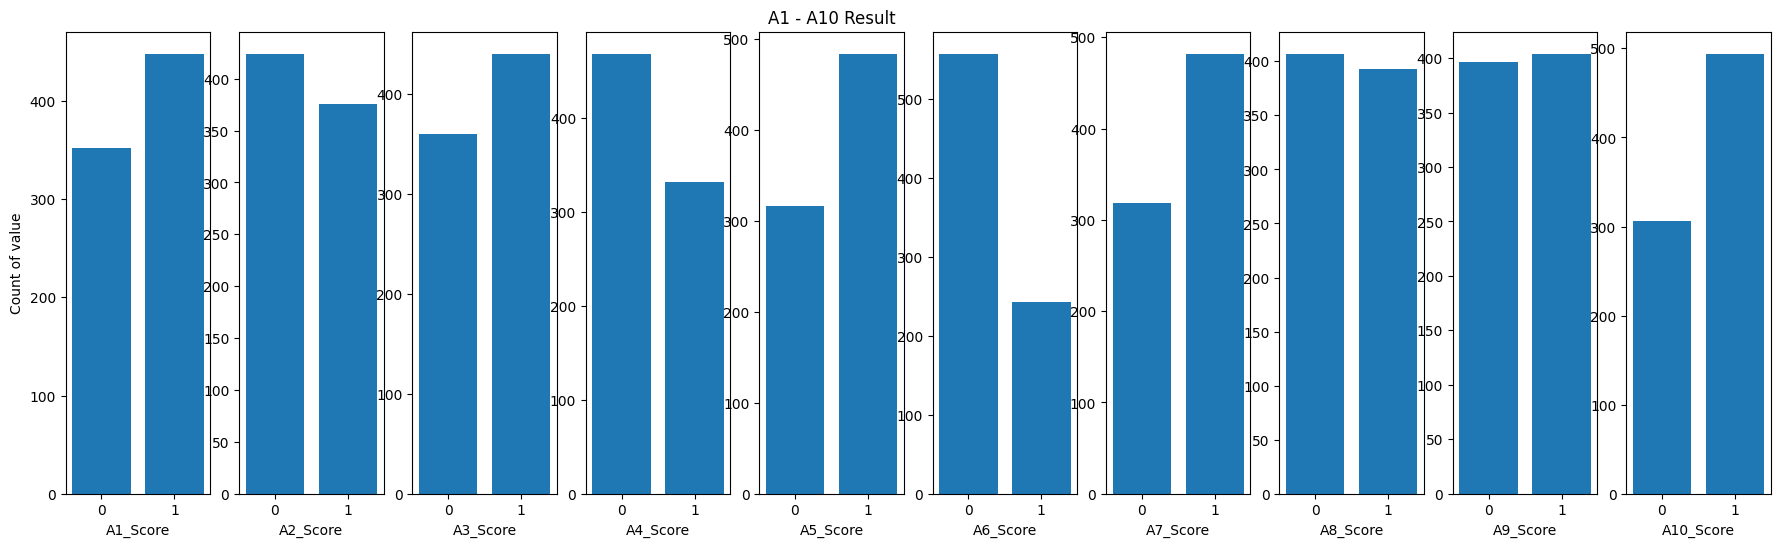

In [144]:
fig, ax=plt.subplots(figsize=(22,6))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

plt.subplot(1, 10, 1)
plt.bar(data_train['A1_Score'].unique(), data_train['A1_Score'].value_counts())
plt.xlabel('A1_Score')
plt.ylabel('Count of value')

plt.subplot(1, 10, 2)
plt.bar(data_train['A2_Score'].unique(), data_train['A2_Score'].value_counts())
plt.xlabel('A2_Score')

plt.subplot(1, 10, 3)
plt.bar(data_train['A3_Score'].unique(), data_train['A3_Score'].value_counts())
plt.xlabel('A3_Score')

plt.subplot(1, 10, 4)
plt.bar(data_train['A4_Score'].unique(), data_train['A4_Score'].value_counts())
plt.xlabel('A4_Score')

plt.subplot(1, 10, 5)
plt.bar(data_train['A5_Score'].unique(), data_train['A5_Score'].value_counts())
plt.xlabel('A5_Score')
plt.title('A1 - A10 Result')

plt.subplot(1, 10, 6)
plt.bar(data_train['A6_Score'].unique(), data_train['A6_Score'].value_counts())
plt.xlabel('A6_Score')

plt.subplot(1, 10, 7)
plt.bar(data_train['A7_Score'].unique(), data_train['A7_Score'].value_counts())
plt.xlabel('A7_Score')

plt.subplot(1, 10, 8)
plt.bar(data_train['A8_Score'].unique(), data_train['A8_Score'].value_counts())
plt.xlabel('A8_Score')

plt.subplot(1, 10, 9)
plt.bar(data_train['A9_Score'].unique(), data_train['A9_Score'].value_counts())
plt.xlabel('A9_Score')

plt.subplot(1, 10, 10)
plt.bar(data_train['A10_Score'].unique(), data_train['A10_Score'].value_counts())
plt.xlabel('A10_Score')

plt.show()

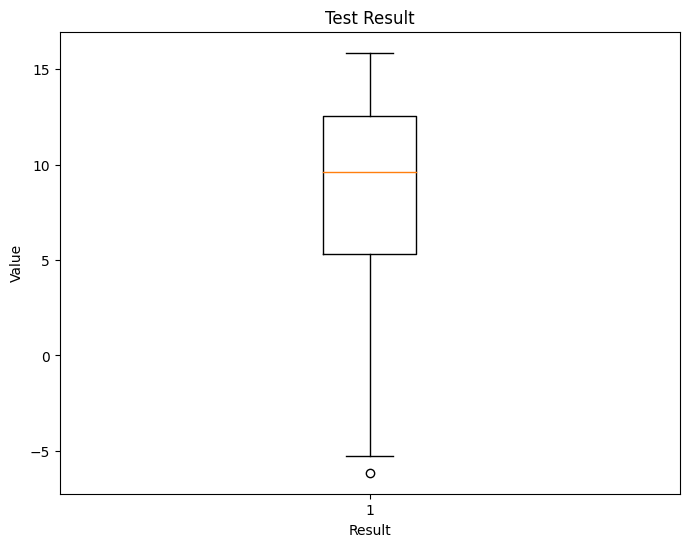

In [145]:
fig, ax=plt.subplots(figsize=(8,6))
ax.boxplot(data_train['result'].dropna())
ax.set_xlabel('Result')
ax.set_ylabel('Value')
plt.title('Test Result')
plt.show()

<ipython-input-146-734940b5e536>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

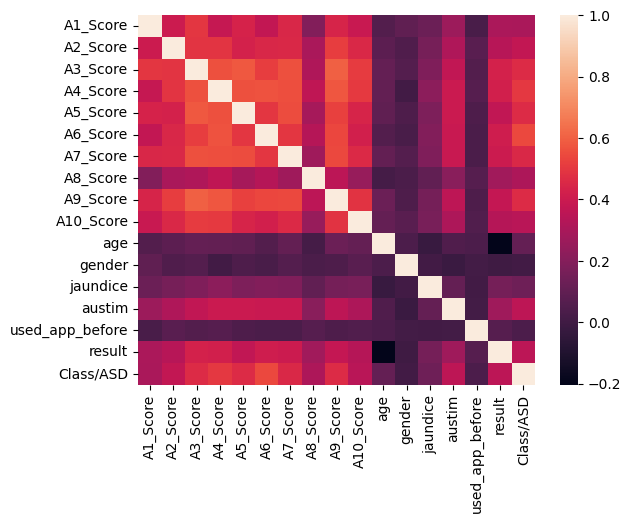

In [146]:
sns.heatmap(data_train.corr())

Model **Building**

In [187]:
X= data_train.loc[:,('A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','age',
                'gender','jaundice', 'austim','contry_of_res','used_app_before','result','relation')]

In [148]:
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,contry_of_res,used_app_before,result,relation
ID,,,,,,,,,,,,,,,,,,
1,1,0,1,0,1,0,1,0,1,1,38.172746,1,0,0,Austria,0,6.351166,Self
2,0,0,0,0,0,0,0,0,0,0,47.750517,0,0,0,India,0,2.255185,Self
3,1,1,1,1,1,1,1,1,1,1,7.380373,0,0,1,United States,0,14.851484,Self
4,0,0,0,0,0,0,0,0,0,0,23.561927,1,0,0,United States,0,2.276617,Self
5,0,0,0,0,0,0,0,0,0,0,43.205790,0,0,0,South Africa,0,-4.777286,Self
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,1,0,0,0,0,0,0,1,1,16.597187,0,0,0,New Zealand,0,12.999501,Self
797,0,1,1,0,0,1,0,1,1,1,20.703001,0,0,0,Cyprus,0,13.561518,Self
798,0,0,0,0,0,0,0,0,0,0,5.711481,0,1,0,New Zealand,0,2.653177,Self


In [149]:
y= data_train['Class/ASD']

In [150]:
y

ID
1      0
2      0
3      1
4      0
5      0
      ..
796    0
797    0
798    0
799    0
800    0
Name: Class/ASD, Length: 800, dtype: int64

In [151]:
y.value_counts(normalize=True)

0    0.79875
1    0.20125
Name: Class/ASD, dtype: float64

In [152]:
cols_binary_numerical = X.columns.drop(['contry_of_res', 'relation','age','result'])

In [153]:
cols_binary_numerical

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jaundice',
       'austim', 'used_app_before'],
      dtype='object')

In [154]:
cols_numerical = ['age','result']

In [155]:
cols_numerical

['age', 'result']

In [156]:
cols_categorical = ['contry_of_res', 'relation']


In [157]:
cols_categorical

['contry_of_res', 'relation']

In [158]:
def count_boundary(col):

  q1 = col.quantile(0.25)
  q3 = col.quantile(0.75)
  iqr = q3 - q1

  low_boundary = q1 - 1.5 * iqr
  upper_boundary = q3 + 1.5 * iqr

  return low_boundary, upper_boundary

In [159]:
class DetectOutliersTransformer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    #'age', 'result'
    self.agelb, self.ageub = count_boundary(X['age'])
    self.agemean = X['age'].mean()

    self.resultlb, self.resultub = count_boundary(X['result'])
    self.resultmean = X['result'].mean()

    return self

  def transform(self, X):

    X[(X['age']> self.ageub) | (X['age']< self.agelb)]['age']= self.agemean
    X[(X['result']> self.resultub) | (X['result']< self.resultlb)]['result'] = self.resultmean

    return X

In [160]:
transformer_numerical = Pipeline(steps = [            #transformer for numerical data
    ('outlier', DetectOutliersTransformer()),         #we want to detetect outelier with our own Transformer
    ('imputer', SimpleImputer(strategy = 'mean')),    #we want to imput data
    ('discretizer', None),
    ('scaler', StandardScaler())                      #we want to scale our data
])

In [161]:
transformer_binary_numerical = Pipeline(steps = [            #transformer for numerical data
    ('imputer', SimpleImputer(strategy = 'most_frequent'))    #we want to imput data
])

In [162]:
transformer_categorical = Pipeline(steps = [            #transformer for categorical data
    ('imputer', SimpleImputer(strategy = 'most_frequent'))    #we want to imput categorical data
    ,('onehotenc', OneHotEncoder(handle_unknown='ignore'))
])


In [163]:
preprocessor = ColumnTransformer(transformers =[              #preprocessor - if we want to have eg. transformer for binary data, we should create binary_transformer and add it here
    ('numerical', transformer_numerical, cols_numerical),
    ('binary_numerical', transformer_binary_numerical, cols_binary_numerical),
    ('categorical', transformer_categorical, cols_categorical),
])

In [164]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=2023)

In [165]:
pipeline_LogisticRegression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',  LogisticRegression(random_state=2023))
])


pipeline_LogisticRegression.fit(X_train, y_train)

<ipython-input-159-b18daf434886>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-159-b18daf434886>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlier',
                                                                   DetectOutliersTransformer()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('discretizer',
                                                                   None),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'result']),
                                                 ('binary_numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index(['A1_Score', 'A2_Score', '...5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jaundice',
       'austim', 'used_app_before'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['contry_of_res',
                                                   'relation'])])),
                ('model', LogisticRegression(random_state=2023))])

In [169]:
pipeline_RandomForestClassifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=2023))
])

pipeline_RandomForestClassifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlier',
                                                                   DetectOutliersTransformer()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('discretizer',
                                                                   None),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'result']),
                                                 ('binary_numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index(['A1_Score', 'A2_Score', '...ore', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jaundice',
       'austim', 'used_app_before'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['contry_of_res',
                                                   'relation'])])),
                ('model', RandomForestClassifier(random_state=2023))])

In [170]:
pipeline_RandomForestClassifier.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('outlier',
                                                     DetectOutliersTransformer()),
                                                    ('imputer', SimpleImputer()),
                                                    ('discretizer', None),
                                                    ('scaler', StandardScaler())]),
                                    ['age', 'result']),
                                   ('binary_numerical',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
          'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jaundice',
          'austim', 'used_app_before'],
         

In [171]:
!pip install hyperopt

In [172]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

In [173]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [174]:
def objective_RandomForestClassifier(search_space):
  pipeline_RandomForestClassifier = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('model', RandomForestClassifier(**search_space, random_state=2023))
      ])

  pipeline_RandomForestClassifier.fit(X_train, y_train)
  y_pred = pipeline_RandomForestClassifier.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred)
  return {'loss': -accuracy, 'status': STATUS_OK}

In [175]:
search_space={
    'n_estimators':hp.randint('n_estimators',200,1000),
    'max_depth': hp.randint('max_depth',10,200),
    'min_samples_split':hp.uniform('min_samples_split',0,1),
    'min_samples_leaf':hp.randint('min_samples_leaf',1,10),
    'criterion':hp.choice('criterion',['gini','entropy']),
    'max_features':hp.choice('max_features',['sqrt', 'log2']) }

In [176]:
best_params = fmin(
  fn=objective_RandomForestClassifier,
  space=search_space,
  algo=tpe.suggest,
  max_evals=200, trials=Trials())

100%|██████████| 200/200 [04:35<00:00,  1.38s/trial, best loss: -0.9]


In [177]:
best_params_evaluated = space_eval(search_space, best_params)

In [178]:
best_params_evaluated

{'criterion': 'entropy',
 'max_depth': 115,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 0.011321615917955073,
 'n_estimators': 807}

In [179]:
best_model_RandomForestClassifier = pipeline_RandomForestClassifier.set_params(
    model__criterion=best_params_evaluated['criterion'],
    model__max_depth=best_params_evaluated['max_depth'],
    model__max_features=best_params_evaluated['max_features'],
    model__min_samples_leaf=best_params_evaluated['min_samples_leaf'],
    model__min_samples_split=best_params_evaluated['min_samples_split'],
    model__n_estimators=best_params_evaluated['n_estimators']
)

In [180]:
def objective_LogisticRegression(search_space):
  pipeline_LogisticRegression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',  LogisticRegression(**search_space, random_state=2023))
    ])

  pipeline_LogisticRegression.fit(X_train, y_train)
  y_pred = pipeline_LogisticRegression.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred)
  return {'loss': -accuracy, 'status': STATUS_OK}

In [181]:
search_space={
    'C': hp.loguniform('C', -5, 2),
    'fit_intercept': hp.choice('fit_intercept', [True, False]),
    'solver': hp.choice('solver', ['liblinear', 'lbfgs', 'saga'])
    }

In [182]:
best_params = fmin(
  fn=objective_LogisticRegression,
  space=search_space,
  algo=tpe.suggest,
  max_evals=200, trials=Trials())

100%|██████████| 200/200 [00:11<00:00, 17.05trial/s, best loss: -0.89375]


In [183]:
best_params_evaluated = space_eval(search_space, best_params)

In [184]:
best_model_LogisticRegression = pipeline_LogisticRegression.set_params(
    model__fit_intercept=best_params_evaluated['fit_intercept'],
    model__C=best_params_evaluated['C'],
    model__solver=best_params_evaluated['solver']
)

In [185]:
X_test = data_test.loc[:, ('A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','age',
                'gender','jaundice', 'austim','contry_of_res','used_app_before','result','relation')]

In [186]:
best_model_RandomForestClassifier.fit(X_train, y_train)
best_model_RandomForestClassifier.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])